In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

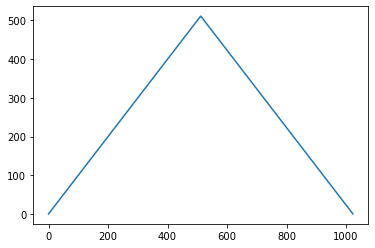

In [3]:
# Generate a nice frequency response.
a = np.arange(512)
b = np.arange(511, -1, -1)
X = np.concatenate([a, b])
plt.plot(X);

In [4]:
# What the signal looks like doesn't matter.
x = np.fft.ifft(np.fft.ifftshift(X))

In [5]:
def do_fft(arr):
    return np.fft.fftshift(np.fft.fft(arr))

def plot_fft(arr):
    plt.plot(np.abs(do_fft(arr)))

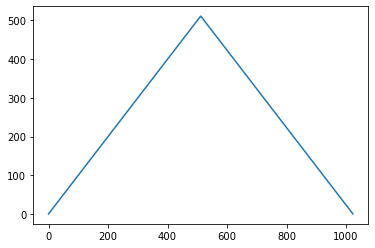

In [6]:
plot_fft(x)

In [7]:
assert np.allclose(do_fft(x), X)

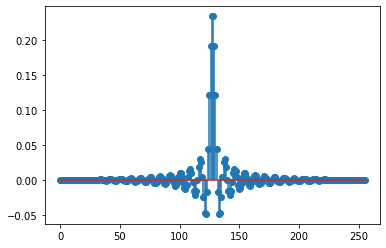

In [37]:
# Design a low-pass FIR filter, with a cut-off frequency at 0.24π.
fir = signal.firwin(256, 0.24)
plt.stem(fir);

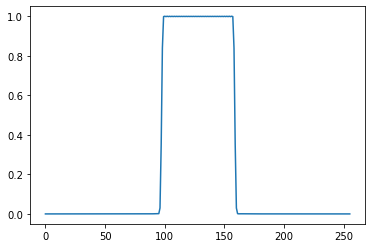

In [38]:
plot_fft(fir)

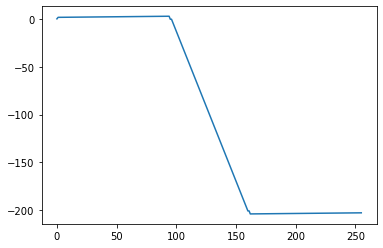

In [44]:
# This is a linear phase filter (no phase distortion but non-zero group delay).
plt.plot(np.unwrap(np.angle(do_fft(fir))));

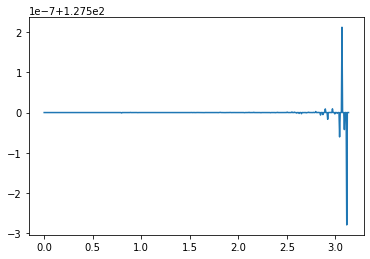

In [50]:
# Hopefully constant group delay (in samples).
plt.plot(*signal.group_delay((fir, 1)));

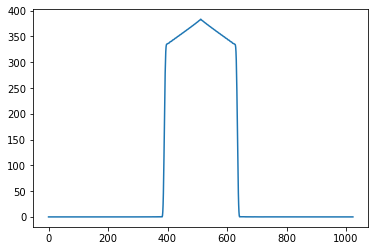

In [9]:
# Need to low-pass filter the signal before decimating, to avoid aliasing.
x_lp = signal.lfilter(fir, 1, x)
plot_fft(x_lp)

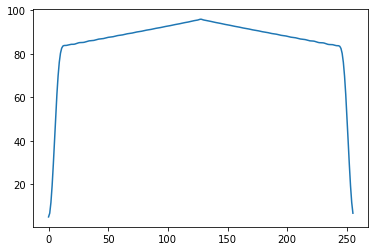

In [10]:
# Downsampling factors > 4 result in aliasing.
y_d = x_lp[::4]
plot_fft(y_d)

<StemContainer object of 3 artists>

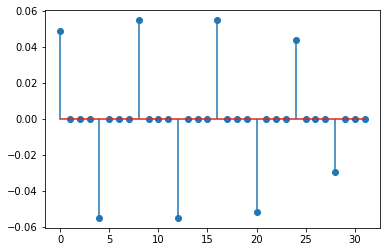

In [11]:
# Interpolate by inserting zeros first.
v_i = np.zeros(y_d.size * 4, dtype=np.cdouble)
v_i[::4] = y_d
plt.stem(np.real(v_i[:32]))

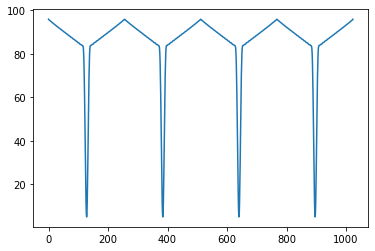

In [12]:
# This results in aliasing!
plot_fft(v_i)

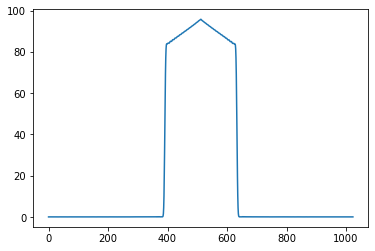

In [13]:
# Need another low-pass filter to get rid of aliasing.
y_i = signal.lfilter(fir, 1, v_i)
plot_fft(y_i)

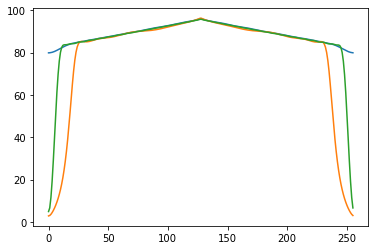

In [61]:
plot_fft(signal.decimate(x, 4, ftype="fir", zero_phase=False))
plot_fft(signal.decimate(x, 4, ftype="iir", zero_phase=False))
plot_fft(y_d)